# IS 597 Final Project
Jess Rogovin

## Hypothesis 1

In [36]:
from hypothesis1 import get_retracted_articles, get_date_range, count_years
import matplotlib.pyplot as plt

ImportError: cannot import name 'get_date_range' from 'hypothesis1' (/Users/jessicarogovin/PycharmProjects/analysis_of_retracted_articles_2023/hypothesis1.py)

In [35]:
year_count = count_years(get_date_range(get_retracted_articles('data/retractions.csv')))
print(year_count)

NameError: name 'get_date_range' is not defined

<BarContainer object of 57 artists>

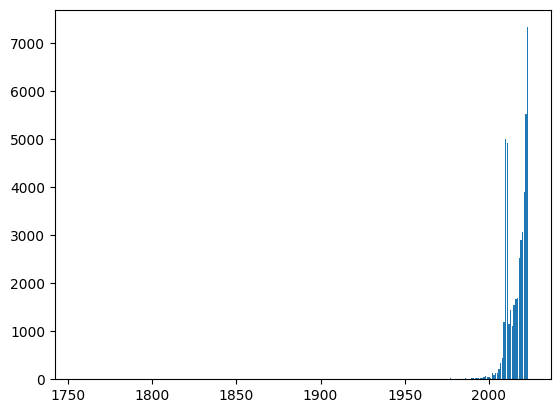

In [34]:
plt.bar(year_count.keys(), year_count.values())